In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn 
import re
import string

In [3]:
fnd = pd.read_csv (r'/content/drive/MyDrive/New/Clean/FakeNewsD_clean.csv')
isot = pd.read_csv (r'/content/drive/MyDrive/New/Clean/isot_clean.csv')
fn = pd.read_csv (r'/content/drive/MyDrive/New/Clean/FakeNews_clean.csv')
liar = pd.read_csv (r'/content/drive/MyDrive/New/Clean/LIAR_clean.csv')

In [ ]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3210 non-null   int64 
 1   title       3210 non-null   object
 2   statement   3210 non-null   object
 3   label       3210 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 100.4+ KB


In [ ]:
fnd = fnd.dropna()

In [ ]:
fnd['label'] = pd.to_numeric(fnd['label'], errors='coerce')

In [ ]:

fnd = fnd.dropna(subset=['label'])

In [ ]:
fnd['label'] = fnd['label'].astype(int)

In [ ]:
del fnd['Unnamed: 0']

In [ ]:
del fnd['title']

In [ ]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  3210 non-null   object
 1   label      3210 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.3+ KB


In [ ]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17544 non-null  int64 
 1   statement   17544 non-null  object
 2   label       17544 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 411.3+ KB


In [ ]:
del fn['Unnamed: 0']

In [ ]:
fn = fn.dropna()

In [ ]:
fn['label'] = fn['label'].astype(int)

In [ ]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  17544 non-null  object
 1   label      17544 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 274.2+ KB


In [ ]:
isot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42768 entries, 0 to 42767
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42768 non-null  int64 
 1   statement   42768 non-null  object
 2   label       42768 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1002.5+ KB


In [ ]:
del isot['Unnamed: 0']

In [ ]:
isot = isot.dropna()

In [ ]:
isot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42768 entries, 0 to 42767
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  42768 non-null  object
 1   label      42768 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 668.4+ KB


In [ ]:
liar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11505 entries, 0 to 11504
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11505 non-null  int64 
 1   label       11505 non-null  int64 
 2   statement   11501 non-null  object
dtypes: int64(2), object(1)
memory usage: 269.8+ KB


In [ ]:
liar = liar.dropna()

In [ ]:
liar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 0 to 11504
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11501 non-null  int64 
 1   label       11501 non-null  int64 
 2   statement   11501 non-null  object
dtypes: int64(2), object(1)
memory usage: 359.4+ KB


In [ ]:
del liar['Unnamed: 0']

In [ ]:
df = pd.concat([isot,fnd,fn,liar])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75023 entries, 0 to 11504
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  75023 non-null  object
 1   label      75023 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75023 entries, 0 to 11504
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  75023 non-null  object
 1   label      75023 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df.to_csv(r'/content/drive/MyDrive/New/Clean/Combined_clean.csv')

In [4]:
df = pd.read_csv (r'/content/drive/MyDrive/New/Clean/Combined_clean.csv')

In [5]:
df.head()

,Unnamed: 0,statement,label
0,0,rogue government twitter account consider help...,1
1,1,accord sun w bush successor promise close camp...,1
2,2,regime allow wrest control election state good...,1
3,3,berlin earn reputation chief crisis manager mu...,0
4,4,chair sit chuck meet press two discuss trump r...,1


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(df['statement'].apply(lambda x: np.str_(x)))
y = df['label']

import joblib
# Save the TfidfVectorizer
joblib.dump(tfidf_v, '/content/drive/MyDrive/Colab Notebooks/weights/Combined/learners/tfidf_combined.pkl')

['/content/drive/MyDrive/Colab Notebooks/weights/Combined/learners/tfidf_combined.pkl']

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75023 entries, 0 to 75022
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  75023 non-null  int64 
 1   statement   75023 non-null  object
 2   label       75023 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Model accuracy score with default hyperparameters: 0.8726
Precision: 0.882 / Recall: 0.823 / F1-Score: 0.851 / Accuracy: 0.873
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8353
           1       0.88      0.82      0.85      6652

    accuracy                           0.87     15005
   macro avg       0.87      0.87      0.87     15005
weighted avg       0.87      0.87      0.87     15005



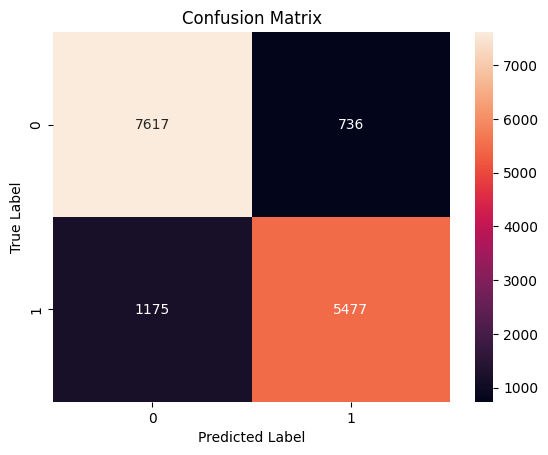

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression(max_iter=500)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Model accuracy score with default hyperparameters: 0.9012
Precision: 0.925 / Recall: 0.846 / F1-Score: 0.884 / Accuracy: 0.901
              precision    recall  f1-score   support

           0       0.89      0.95      0.91      8353
           1       0.92      0.85      0.88      6652

    accuracy                           0.90     15005
   macro avg       0.90      0.90      0.90     15005
weighted avg       0.90      0.90      0.90     15005



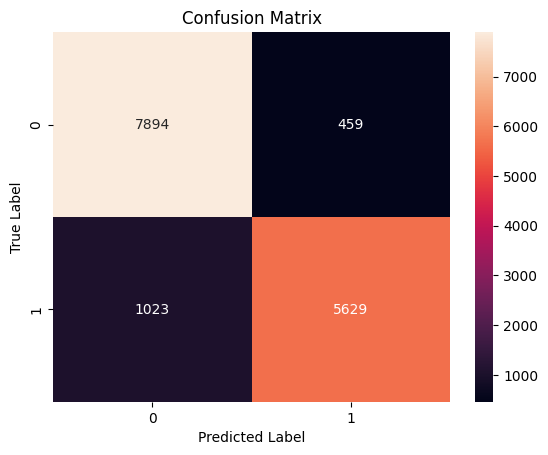

['/content/drive/MyDrive/Colab Notebooks/weights/Combined/svm_combined.pkl']

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

joblib.dump(svc, '/content/drive/MyDrive/Colab Notebooks/weights/Combined/svm_combined.pkl')

Iteration 1, loss = 0.34776786
Iteration 2, loss = 0.26150878
Iteration 3, loss = 0.23454149
Iteration 4, loss = 0.21085265
Iteration 5, loss = 0.18879649
Iteration 6, loss = 0.16454053
Iteration 7, loss = 0.14500376
Iteration 8, loss = 0.12409115
Iteration 9, loss = 0.10890618
Iteration 10, loss = 0.09908293
Iteration 11, loss = 0.09129950
Iteration 12, loss = 0.08521920
Iteration 13, loss = 0.07677389
Iteration 14, loss = 0.07521222
Iteration 15, loss = 0.06961730
Iteration 16, loss = 0.06553496
Iteration 17, loss = 0.06839063
Iteration 18, loss = 0.06525210
Iteration 19, loss = 0.05973648
Iteration 20, loss = 0.05557075
Iteration 21, loss = 0.05493728
Iteration 22, loss = 0.05526664
Iteration 23, loss = 0.05246864
Iteration 24, loss = 0.05100329
Iteration 25, loss = 0.04896686
Iteration 26, loss = 0.05383057
Iteration 27, loss = 0.05433220
Iteration 28, loss = 0.04971585
Iteration 29, loss = 0.04501344
Iteration 30, loss = 0.04185602
Iteration 31, loss = 0.04169252
Iteration 32, los

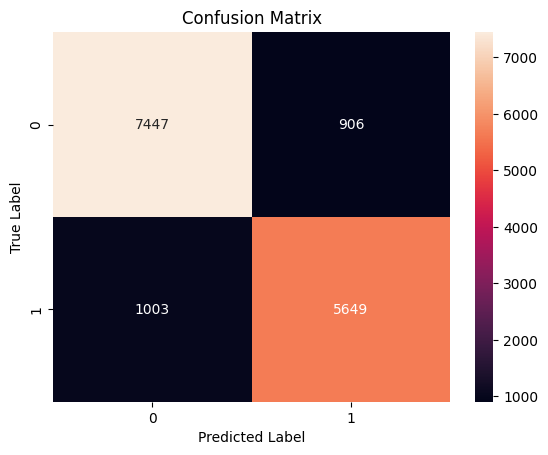

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

# Make prediction on test dataset
y_pred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.802 / Recall: 0.202 / F1-Score: 0.323 / Accuracy: 0.624
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      8353
           1       0.80      0.20      0.32      6652

    accuracy                           0.62     15005
   macro avg       0.70      0.58      0.53     15005
weighted avg       0.69      0.62      0.55     15005



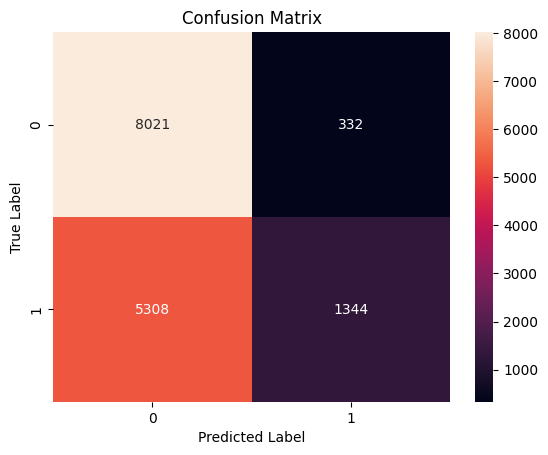

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred = knn.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))
    
# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.909 / Recall: 0.827 / F1-Score: 0.866 / Accuracy: 0.887
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8353
           1       0.91      0.83      0.87      6652

    accuracy                           0.89     15005
   macro avg       0.89      0.88      0.88     15005
weighted avg       0.89      0.89      0.89     15005



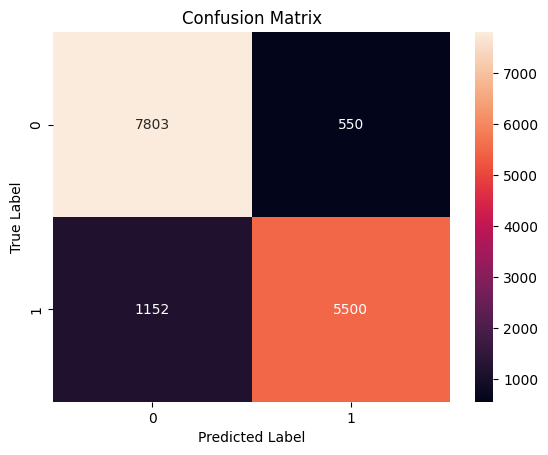

['/content/drive/MyDrive/Colab Notebooks/weights/Combined/rf_combined.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
joblib.dump(rf_model, '/content/drive/MyDrive/Colab Notebooks/weights/Combined/rf_combined.pkl')

Precision: 0.888 / Recall: 0.835 / F1-Score: 0.861 / Accuracy: 0.88


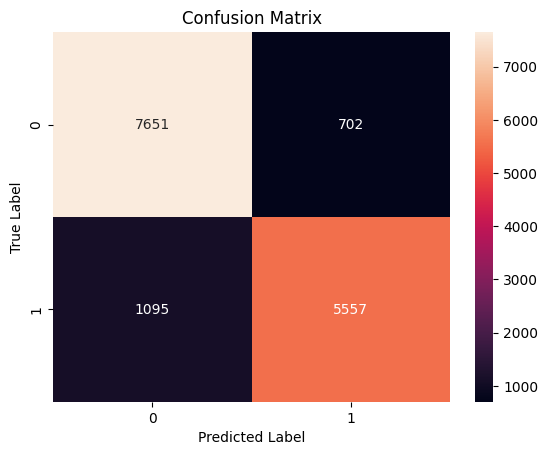

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifiers
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)


# Combine the classifiers using a voting ensemble
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('lr', lr_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
voting_preds = voting_clf.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

predictions = [round(value) for value in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average="weighted")
recall = recall_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 85.92%
Accuracy: 0.8591802732422525
Precision: 0.8639136992163615
Recall: 0.8591802732422525
F1-Score: 0.8574677456021708


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
mse = mean_squared_error(y_test,y_pred)
print("MSE : % f" %(mse))

MSE :  0.111987


In [15]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.334644


In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

predictions = [round(value) for value in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average="weighted")
recall = recall_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8397200933022326
Accuracy: 0.8397200933022326
Precision: 0.8424499721551783
Recall: 0.8397200933022326
F1-Score: 0.838041004302221


Accuracy: 0.8127290903032323
Precision: 0.784 / Recall: 0.797 / F1-Score: 0.791 / Accuracy: 0.813
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      8353
           1       0.78      0.80      0.79      6652

    accuracy                           0.81     15005
   macro avg       0.81      0.81      0.81     15005
weighted avg       0.81      0.81      0.81     15005



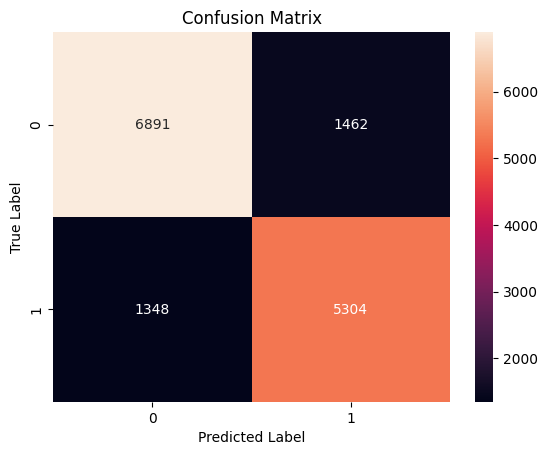

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()